In [1]:
from selenium import webdriver
import pandas as pd
import numpy as np
import requests
from time import sleep
from selenium.webdriver.common.by import By
import random
from webdriver_manager.microsoft import EdgeChromiumDriverManager
import time
import matplotlib.pyplot as plt

In [5]:
links = dt['Links']

In [12]:
# Cào dữ liệu cấu hình điện thoại CellphoneS
name_ = []
ram_ = []
rom_ = []
os_ = []

for i in links:
    driver = webdriver.Edge(EdgeChromiumDriverManager().install())
    driver.get('%s' % i)  # Lấy link của từng sản phẩm
    time.sleep(2)
    driver.implicitly_wait(10)  # Thời gian chờ xử lý bất đồng bộ
    name = driver.find_element(By.CLASS_NAME, 'box-product-name').text
    os = ''
    ram = ''
    rom = ''
    try:
        parameter_list = driver.find_element(By.CLASS_NAME, 'technical-content')
        parameter_items = parameter_list.find_elements(By.CLASS_NAME, 'technical-content-item')

        for item in parameter_items:
            p_element = item.find_element(By.TAG_NAME, 'p')
            content_element = item.find_element(By.TAG_NAME, 'div')
            content_text = content_element.text
            
            if p_element.text == 'Hệ điều hành':
                os = content_text
            elif p_element.text == 'Dung lượng RAM':
                ram = content_text
            elif p_element.text == 'Bộ nhớ trong':
                rom = content_text
    except:
        os = 'N/A'
        ram = 'N/A'
        rom = 'N/A'

    name_.append(name)
    os_.append(os)
    ram_.append(ram)
    rom_.append(rom)

    driver.implicitly_wait(10)  # Thời gian chờ xử lý bất đồng bộ
    driver.close()  # Đóng trình duyệt khi lấy xong dữ liệu


In [4]:
dt = pd.read_csv('./DienThoaiCellphoneS.csv')
dt

,Unnamed: 0,Index,Name,Inches,Software,Price,Links
0,0,1,OPPO Reno7 4G (8GB - 128GB),6.43 inches,Android 11- ColorOS 12,79900000.0,https://cellphones.com.vn/oppo-reno7-128gb.html
1,1,2,OPPO A16K,6.52 inches,Android 11,36900000.0,https://cellphones.com.vn/oppo-a16k.html
2,2,3,OPPO A95,6.43 inches,Android 11,5090000.0,https://cellphones.com.vn/oppo-a95.html
3,3,4,OPPO Reno7 (5G),6.43 inches,Android 11- ColorOS 12,129900000.0,https://cellphones.com.vn/oppo-reno-7.html
4,4,5,OPPO Reno7 Z (5G),6.43 inches,Android 11 - ColorOS 12,99900000.0,https://cellphones.com.vn/oppo-reno7-z.html
...,...,...,...,...,...,...,...
200,200,201,Vsmart Bee 5,6.0 inches,9.0 (Pie),1590000.0,https://cellphones.com.vn/vsmart-bee-5.html
201,201,202,Huawei P30 Lite,6.15 inches,Android v9.0 (Pie),7490000.0,https://cellphones.com.vn/huawei-p30-lite-1.html
202,202,203,Huawei P30 Pro,6.4 inches,Android v9.0 (Pie),23990000.0,https://cellphones.com.vn/huawei-p30-pro-1.html
203,203,204,Huawei P30,6.1 inches,Android v9.0 (Pie),17990000.0,https://cellphones.com.vn/huawei-p30-1.html


In [13]:
dt = pd.DataFrame(list(zip(name_, os_, ram_, rom_, links)), columns= ['Name','OS', 'RAM', 'ROM','Links'])
dt

,Name,OS,RAM,ROM,Links
0,OPPO Reno7 4G (8GB - 128GB),"Android 11, ColorOS 12",8 GB,128 GB,https://cellphones.com.vn/oppo-reno7-128gb.html
1,OPPO A16K,Android 11,3 GB,32 GB,https://cellphones.com.vn/oppo-a16k.html
2,OPPO A95,Android 11,8 GB,128 GB,https://cellphones.com.vn/oppo-a95.html
3,OPPO Reno7 (5G),"Android 11, ColorOS 12",8 GB,256 GB,https://cellphones.com.vn/oppo-reno-7.html
4,OPPO Reno7 Z (5G),Android 11 - ColorOS 12,8 GB,128 GB,https://cellphones.com.vn/oppo-reno7-z.html
...,...,...,...,...,...
200,Vsmart Bee 5,9.0 (Pie),,16 GB,https://cellphones.com.vn/vsmart-bee-5.html
201,Huawei P30 Lite,Android v9.0 (Pie),6 GB,128 GB,https://cellphones.com.vn/huawei-p30-lite-1.html
202,Huawei P30 Pro,Android v9.0 (Pie),8 GB,256 GB,https://cellphones.com.vn/huawei-p30-pro-1.html
203,Huawei P30,Android v9.0 (Pie),8 GB,128 GB,https://cellphones.com.vn/huawei-p30-1.html


In [14]:
dt.to_csv('CauHinhDienThoaiCellphoneS.csv')

In [17]:
dt1 = pd.read_csv('./CauHinhDienThoaiCellphoneS.csv')
dt2 = pd.read_csv('./DienThoaiCellphoneS.csv')

In [18]:
dt2

,Unnamed: 0,Index,Name,Inches,Software,Price,Links
0,0,1,OPPO Reno7 4G (8GB - 128GB),6.43 inches,Android 11- ColorOS 12,79900000.0,https://cellphones.com.vn/oppo-reno7-128gb.html
1,1,2,OPPO A16K,6.52 inches,Android 11,36900000.0,https://cellphones.com.vn/oppo-a16k.html
2,2,3,OPPO A95,6.43 inches,Android 11,5090000.0,https://cellphones.com.vn/oppo-a95.html
3,3,4,OPPO Reno7 (5G),6.43 inches,Android 11- ColorOS 12,129900000.0,https://cellphones.com.vn/oppo-reno-7.html
4,4,5,OPPO Reno7 Z (5G),6.43 inches,Android 11 - ColorOS 12,99900000.0,https://cellphones.com.vn/oppo-reno7-z.html
...,...,...,...,...,...,...,...
200,200,201,Vsmart Bee 5,6.0 inches,9.0 (Pie),1590000.0,https://cellphones.com.vn/vsmart-bee-5.html
201,201,202,Huawei P30 Lite,6.15 inches,Android v9.0 (Pie),7490000.0,https://cellphones.com.vn/huawei-p30-lite-1.html
202,202,203,Huawei P30 Pro,6.4 inches,Android v9.0 (Pie),23990000.0,https://cellphones.com.vn/huawei-p30-pro-1.html
203,203,204,Huawei P30,6.1 inches,Android v9.0 (Pie),17990000.0,https://cellphones.com.vn/huawei-p30-1.html


In [32]:
dt2.drop(columns ='Software', axis = 1, inplace = True)

In [29]:
dt2.insert(6, 'OS', os_)

In [33]:
dt2

,Index,Name,Inches,RAM,ROM,OS,Price,Links
0,1,OPPO Reno7 4G (8GB - 128GB),6.43 inches,8 GB,128 GB,"Android 11, ColorOS 12",79900000.0,https://cellphones.com.vn/oppo-reno7-128gb.html
1,2,OPPO A16K,6.52 inches,3 GB,32 GB,Android 11,36900000.0,https://cellphones.com.vn/oppo-a16k.html
2,3,OPPO A95,6.43 inches,8 GB,128 GB,Android 11,5090000.0,https://cellphones.com.vn/oppo-a95.html
3,4,OPPO Reno7 (5G),6.43 inches,8 GB,256 GB,"Android 11, ColorOS 12",129900000.0,https://cellphones.com.vn/oppo-reno-7.html
4,5,OPPO Reno7 Z (5G),6.43 inches,8 GB,128 GB,Android 11 - ColorOS 12,99900000.0,https://cellphones.com.vn/oppo-reno7-z.html
...,...,...,...,...,...,...,...,...
200,201,Vsmart Bee 5,6.0 inches,,16 GB,9.0 (Pie),1590000.0,https://cellphones.com.vn/vsmart-bee-5.html
201,202,Huawei P30 Lite,6.15 inches,6 GB,128 GB,Android v9.0 (Pie),7490000.0,https://cellphones.com.vn/huawei-p30-lite-1.html
202,203,Huawei P30 Pro,6.4 inches,8 GB,256 GB,Android v9.0 (Pie),23990000.0,https://cellphones.com.vn/huawei-p30-pro-1.html
203,204,Huawei P30,6.1 inches,8 GB,128 GB,Android v9.0 (Pie),17990000.0,https://cellphones.com.vn/huawei-p30-1.html


In [ ]:
dt2

In [34]:
dt2.to_csv('DienThoai_CellphoneS.csv')

In [35]:
import matplotlib.pyplot as plt

In [167]:
data = pd.read_csv('./DienThoai_CellphoneS.csv')
data

,Unnamed: 0.1,Unnamed: 0,Index,Name,Inches,RAM,ROM,OS,Price,Links
0,0,0,1,OPPO Reno7 4G (8GB - 128GB),6.43 inches,8 GB,128 GB,"Android 11, ColorOS 12",79900000.0,https://cellphones.com.vn/oppo-reno7-128gb.html
1,1,1,2,OPPO A16K,6.52 inches,3 GB,32 GB,Android 11,36900000.0,https://cellphones.com.vn/oppo-a16k.html
2,2,2,3,OPPO A95,6.43 inches,8 GB,128 GB,Android 11,5090000.0,https://cellphones.com.vn/oppo-a95.html
3,3,3,4,OPPO Reno7 (5G),6.43 inches,8 GB,256 GB,"Android 11, ColorOS 12",129900000.0,https://cellphones.com.vn/oppo-reno-7.html
4,4,4,5,OPPO Reno7 Z (5G),6.43 inches,8 GB,128 GB,Android 11 - ColorOS 12,99900000.0,https://cellphones.com.vn/oppo-reno7-z.html
...,...,...,...,...,...,...,...,...,...,...
200,200,200,201,Vsmart Bee 5,6.0 inches,Không Có,16 GB,9.0 (Pie),1590000.0,https://cellphones.com.vn/vsmart-bee-5.html
201,201,201,202,Huawei P30 Lite,6.15 inches,6 GB,128 GB,Android v9.0 (Pie),7490000.0,https://cellphones.com.vn/huawei-p30-lite-1.html
202,202,202,203,Huawei P30 Pro,6.4 inches,8 GB,256 GB,Android v9.0 (Pie),23990000.0,https://cellphones.com.vn/huawei-p30-pro-1.html
203,203,203,204,Huawei P30,6.1 inches,8 GB,128 GB,Android v9.0 (Pie),17990000.0,https://cellphones.com.vn/huawei-p30-1.html


In [168]:
data.drop(columns = 'Unnamed: 0', axis =1, inplace = True)

In [169]:
data.drop(columns = 'Unnamed: 0.1', axis =1, inplace = True)

In [170]:
data.drop(columns = 'Index', axis =1, inplace = True)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    205 non-null    object 
 1   Inches  205 non-null    object 
 2   RAM     205 non-null    object 
 3   ROM     205 non-null    object 
 4   OS      205 non-null    object 
 5   Price   205 non-null    float64
 6   Links   205 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.3+ KB


In [172]:
data

,Name,Inches,RAM,ROM,OS,Price,Links
0,OPPO Reno7 4G (8GB - 128GB),6.43 inches,8 GB,128 GB,"Android 11, ColorOS 12",79900000.0,https://cellphones.com.vn/oppo-reno7-128gb.html
1,OPPO A16K,6.52 inches,3 GB,32 GB,Android 11,36900000.0,https://cellphones.com.vn/oppo-a16k.html
2,OPPO A95,6.43 inches,8 GB,128 GB,Android 11,5090000.0,https://cellphones.com.vn/oppo-a95.html
3,OPPO Reno7 (5G),6.43 inches,8 GB,256 GB,"Android 11, ColorOS 12",129900000.0,https://cellphones.com.vn/oppo-reno-7.html
4,OPPO Reno7 Z (5G),6.43 inches,8 GB,128 GB,Android 11 - ColorOS 12,99900000.0,https://cellphones.com.vn/oppo-reno7-z.html
...,...,...,...,...,...,...,...
200,Vsmart Bee 5,6.0 inches,Không Có,16 GB,9.0 (Pie),1590000.0,https://cellphones.com.vn/vsmart-bee-5.html
201,Huawei P30 Lite,6.15 inches,6 GB,128 GB,Android v9.0 (Pie),7490000.0,https://cellphones.com.vn/huawei-p30-lite-1.html
202,Huawei P30 Pro,6.4 inches,8 GB,256 GB,Android v9.0 (Pie),23990000.0,https://cellphones.com.vn/huawei-p30-pro-1.html
203,Huawei P30,6.1 inches,8 GB,128 GB,Android v9.0 (Pie),17990000.0,https://cellphones.com.vn/huawei-p30-1.html


In [103]:
data['Inches'].unique()

array(['6.43 inches', '6.52 inches', '6.56 inches', '6.59 inches',
       '6.5 inches', '6.7 inches', '6.67 inches', '6.8 inches',
       '6.1 inches', '6.58 inches', '6.6 inches', '6.73 inches',
       '6.78 inches', '6.4 inches', '6.55 inches', '7.6 inches',
       '6.36 inches', '6.72 inches', '6.66 inches', '6.62 inches',
       '6.71 inches', '4.7 inches', '5.4 inches', '6.9 inches',
       '2.4 inches', '6.44 inches', '1.8 inches', '6.51 inches',
       '6.53 inches', '2.8 inches', '6.28 inches', '1.77 inches',
       '6.0 inches', '6.15 inches'], dtype=object)

In [230]:
c = data['Inches'].value_counts()
c

6.7 inches     20
6.5 inches     19
6.1 inches     16
6.6 inches     15
6.67 inches    15
6.43 inches    14
6.8 inches     12
6.78 inches    12
6.56 inches    11
6.4 inches     10
6.52 inches     7
6.51 inches     6
6.55 inches     6
6.58 inches     5
6.44 inches     4
7.6 inches      4
6.66 inches     3
6.72 inches     3
6.71 inches     2
6.9 inches      2
2.4 inches      2
6.73 inches     2
1.8 inches      2
6.59 inches     2
6.53 inches     2
6.36 inches     1
6.62 inches     1
4.7 inches      1
5.4 inches      1
2.8 inches      1
6.28 inches     1
1.77 inches     1
6.0 inches      1
6.15 inches     1
Name: Inches, dtype: int64

Text(0.5, 1.0, 'Biểu đồ kích thước màn hình của điện thoại ở CellphoneS')

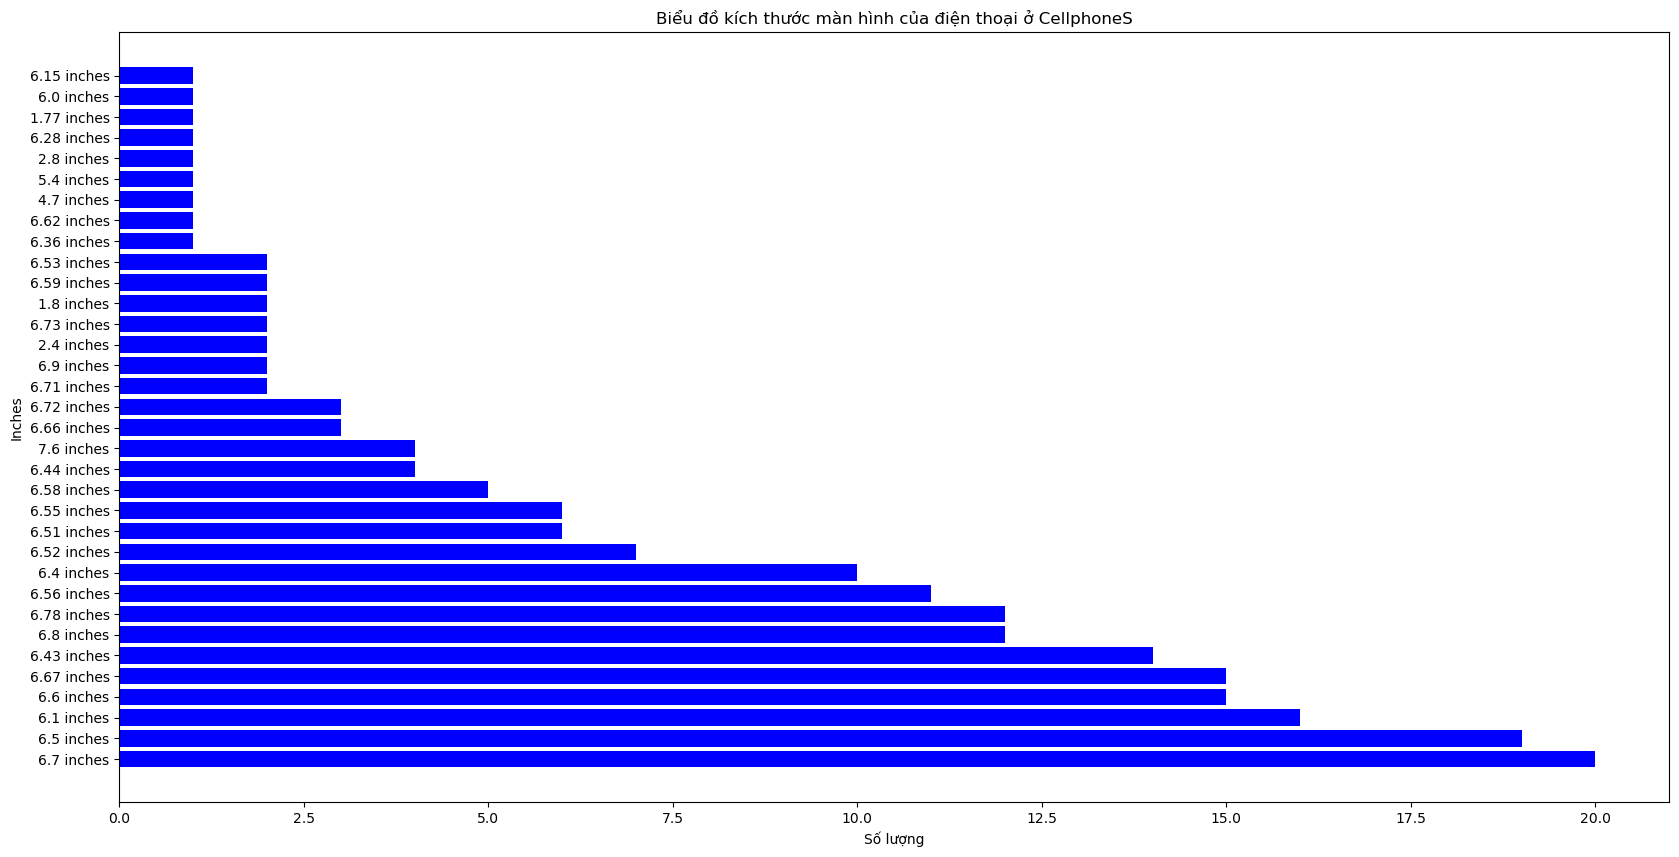

In [234]:
fig = plt.figure(figsize = (20,10))
plt.barh (c.keys(), c.values, color = 'blue')
plt.ylabel('Inches')
plt.xlabel('Số lượng')
plt.title('Biểu đồ kích thước màn hình của điện thoại ở CellphoneS')

In [91]:
data['RAM'].unique()

array(['8 GB', '3 GB', '4 GB', '12 GB', '6 GB', '8GB + Mở rộng 8GB',
       '16 GB', '4GB + Mở rộng 4GB', 'Không Có', '2 GB',
       '4GB + Mở rộng 1GB', '18 GB', '8GB + Mở rộng 4GB'], dtype=object)

In [90]:
data['RAM'] = [i.replace('+ mở rộng 4GB','') for i in data['RAM']]

In [31]:
data[data['RAM'].isnull()]

,Unnamed: 0,Index,Name,Inches,RAM,ROM,OS,Price,Links
126,126,127,Nokia 5710 XpressAudio,2.4 inches,NaN,128 MB,S30+,1760000.0,https://cellphones.com.vn/nokia-5710-xpressaud...
135,135,136,Nokia 105 4G,1.8 inches,NaN,128 MB,NaN,620000.0,https://cellphones.com.vn/nokia-105-4g.html
141,141,142,Nokia 215 4G,2.4 inches,NaN,128 MB,Series 30+,950000.0,https://cellphones.com.vn/nokia-215-4g.html
157,157,158,Nokia 110 4G,1.8 inches,NaN,128 MB,NaN,650000.0,https://cellphones.com.vn/nokia-110-4g.html
165,165,166,Nokia 8210 4G,2.8 inches,NaN,128 MB,S30 +,1490000.0,https://cellphones.com.vn/nokia-8210-4g.html
176,176,177,Nokia 105 2 SIM (2019),1.77 inches,NaN,NaN,NaN,520000.0,https://cellphones.com.vn/nokia-105-dual-sim-2...
200,200,201,Vsmart Bee 5,6.0 inches,NaN,16 GB,9.0 (Pie),1590000.0,https://cellphones.com.vn/vsmart-bee-5.html
204,204,205,Samsung Galaxy A51 6GB,6.5 inches,NaN,64 GB,10,7990000.0,https://cellphones.com.vn/samsung-galaxy-a51-1...


In [32]:
lst_WB = ['Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có']
lst_lo = [126, 135, 141, 157, 165, 176, 200, 204]
for i in  range(len(lst_lo)):
    data.at[lst_lo[i],'RAM'] = lst_WB[i]

In [33]:
data[data['ROM'].isnull()]

,Unnamed: 0,Index,Name,Inches,RAM,ROM,OS,Price,Links
176,176,177,Nokia 105 2 SIM (2019),1.77 inches,Không Có,NaN,NaN,520000.0,https://cellphones.com.vn/nokia-105-dual-sim-2...


In [34]:
data.loc[176, 'ROM'] = 'Không Có'

In [35]:
data[data['OS'].isnull()]

,Unnamed: 0,Index,Name,Inches,RAM,ROM,OS,Price,Links
135,135,136,Nokia 105 4G,1.8 inches,Không Có,128 MB,NaN,620000.0,https://cellphones.com.vn/nokia-105-4g.html
157,157,158,Nokia 110 4G,1.8 inches,Không Có,128 MB,NaN,650000.0,https://cellphones.com.vn/nokia-110-4g.html
176,176,177,Nokia 105 2 SIM (2019),1.77 inches,Không Có,Không Có,NaN,520000.0,https://cellphones.com.vn/nokia-105-dual-sim-2...
191,191,192,Nokia C20 2GB 16GB,6.52 inches,2 GB,16 GB,NaN,1450000.0,https://cellphones.com.vn/nokia-c20-16gb.html


In [36]:
lst_WB = ['Không Có','Không Có','Không Có','Không Có']
lst_lo = [135, 157, 176, 191]
for i in  range(len(lst_lo)):
    data.at[lst_lo[i],'OS'] = lst_WB[i]

In [37]:
data['OS'].unique()

array(['Android 11, ColorOS 12', 'Android 11', 'Android 11 - ColorOS 12',
       'ColorOS 12.1, nền tảng Android 12', 'iOS 16', 'Android 12',
       'Android', 'Coloros 13', 'iOS 15', 'Android 12, Funtouch OS 12',
       'Android 12, One UI 4.1',
       'iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)',
       'Android 13', 'Android 10, One UI 2.5',
       'iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)',
       'Android 12, MIUI 13', 'iOS15', 'MIUI 13, Android 12',
       'MIUI 13 dựa trên Android 11', 'Android 12, MIUI 14', 'Android™ T',
       'MIUI 14, Android 13', 'Android 11, MIUI 12.5', 'Android™ 12',
       'Android 12, UI 3.0', 'Funtouch OS 13', 'MIUI 14 cho POCO',
       'Android 12, Realme UI 3.0', 'MIUI 13, Android 11',
       'UI 3.0, Android 12', 'MIUI 13 (Android 12)',
       'Android 11, MIUI 12', 'Android 12 One UI',
       'MIUI 12.5, Android 11', 'OxygenOS trên nền tảng Android™ 13',
       'ColorOS 13, nền tảng Android 13', 'Android 12, OneUI 4',
       'MIUI

In [38]:
android_versions = data['OS'][data['OS'].astype(str).str.startswith('Android')]
ios_versions = data['OS'][data['OS'].astype(str).str.startswith('iOS')]

In [64]:
android_count = android_versions
android_count

0       Android 11, ColorOS 12
1                   Android 11
2                   Android 11
3       Android 11, ColorOS 12
4      Android 11 - ColorOS 12
                ...           
196        Android 10, MIUI 12
197                 Android 11
201         Android v9.0 (Pie)
202         Android v9.0 (Pie)
203         Android v9.0 (Pie)
Name: OS, Length: 140, dtype: object

In [65]:
ios_count=ios_versions
ios_count

8                                                 iOS 16
12                                                iOS 15
15                                                iOS 16
16                                                iOS 16
17     iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát ...
18                                                iOS 16
21     iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)
23                                                iOS 16
24     iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)
25                                                 iOS15
31     iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát ...
34                                                 iOS15
35     iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát ...
42                                                 iOS15
45                                                iOS 16
46                                                iOS 16
59                                                iOS 16
66                             

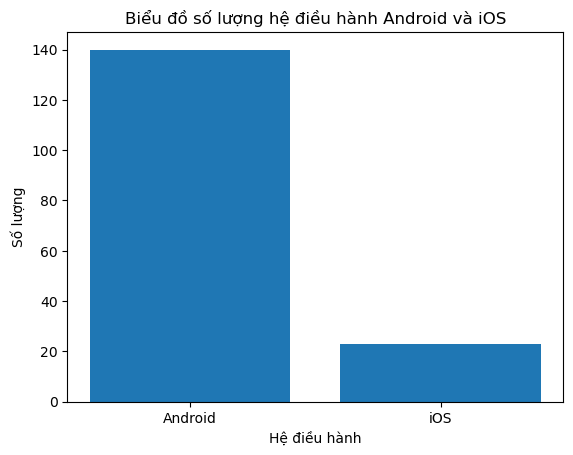

In [70]:
x = ['Android', 'iOS']
y = [len(android_versions.tolist()), len(ios_versions.tolist())]

plt.bar(x, y)
plt.xlabel('Hệ điều hành')
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng hệ điều hành Android và iOS')

plt.show()


In [217]:
a = data['Price'][data['Price'] <= 10000000.0]
thap =len(a)/len(data)*100
thap

16.585365853658537

In [221]:
b = data['Price'][(data['Price'] > 10000000.0) & (data['Price'] <= 25000000.0)]
trung_binh = len(b)/len(data)*100
trung_binh

11.219512195121952

In [222]:
c = data['Price'][(data['Price'] > 25000000.0)]
cao_cap = len(c)/len(data)*100
cao_cap

72.1951219512195

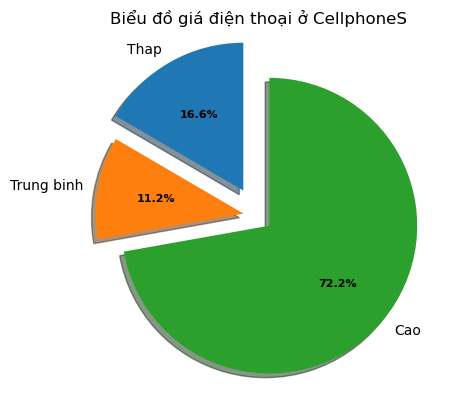

In [224]:
labels = ['Thap', 'Trung binh', 'Cao']
counts = [thap, trung_binh, cao_cap]
myexplode = [0.2, 0.1, 0.1]

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=myexplode, shadow=True)

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Biểu đồ giá điện thoại ở CellphoneS")

plt.show()


In [97]:
a = data['RAM'].value_counts()
a

8 GB                 73
4 GB                 33
6 GB                 26
12 GB                24
3 GB                 14
16 GB                 9
Không Có              8
2 GB                  8
8GB + Mở rộng 8GB     5
4GB + Mở rộng 1GB     2
4GB + Mở rộng 4GB     1
18 GB                 1
8GB + Mở rộng 4GB     1
Name: RAM, dtype: int64

Text(0.5, 1.0, 'Bieu do RAM cua dien thoai o CellphoneS')

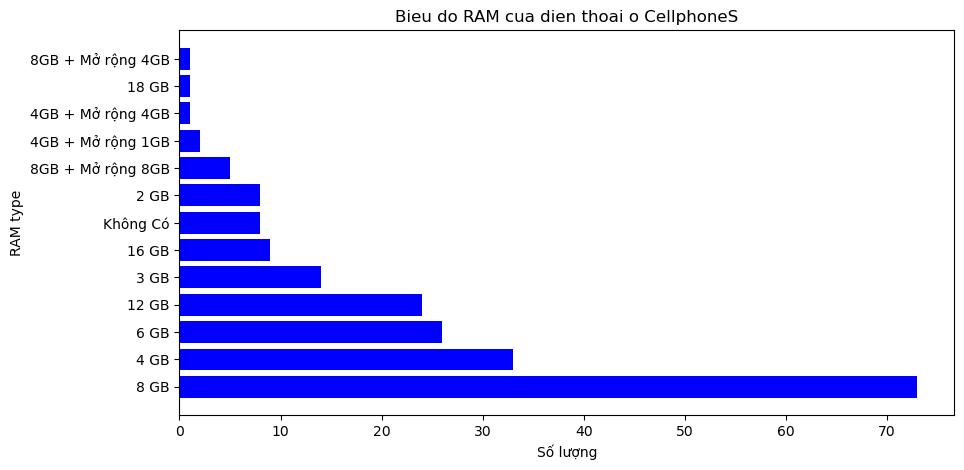

In [101]:
fig = plt.figure(figsize = (10,5))
plt.barh (a.keys(), a.values, color = 'blue')
plt.ylabel('RAM type')
plt.xlabel('Số lượng')
plt.title('Bieu do RAM cua dien thoai o CellphoneS')

In [95]:
b = data['ROM'].value_counts()
b

128 GB      84
256 GB      65
64 GB       22
32 GB       15
512 GB      10
128 MB       5
16 GB        2
1 TB         1
Không Có     1
Name: ROM, dtype: int64

Text(0.5, 1.0, 'Bieu do ROM cua dien thoai o CellphoneS')

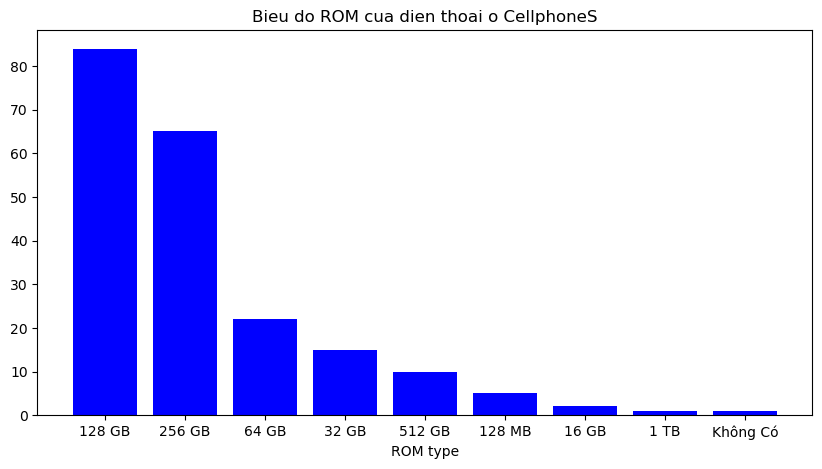

In [96]:
fig = plt.figure(figsize = (10,5))
plt.bar (b.keys(), b.values, color = 'blue')
plt.xlabel('ROM type')
plt.ylabel('')
plt.title('Bieu do ROM cua dien thoai o CellphoneS')

In [173]:
data.to_csv('DienThoai_CellphoneS.csv')

In [177]:
df['Price'] = [str(i) for i in df['Price']]
df['Price'] = [i.replace('*','') for i in df['Price']]
df['Price'] = [i.replace('.', '') for i in df['Price']]
df['Price'] = [i.replace('₫', '') for i in df['Price']]
# df['Price'] = [float(i) for i in df['Price']]

In [176]:
df = pd.read_csv('./Dienthoai_TGDD.csv')

In [178]:
df

,Unnamed: 0,Name,Price,OS,RAM,Storage,Links
0,0,Điện thoại Samsung Galaxy A14 6GB,4990000,Android 13,6 GB,128 GB,https://www.thegioididong.com/dtdd/samsung-gal...
1,1,Điện thoại OPPO Find N2 Flip 5G,19990000,Android 13,8 GB,256 GB,https://www.thegioididong.com/dtdd/oppo-find-n...
2,2,Điện thoại iPhone 14 Pro Max 128GB,26680000,iOS 16,6 GB,128 GB,https://www.thegioididong.com/dtdd/iphone-14-p...
3,3,Điện thoại iPhone 14 Pro 128GB,24790000,iOS 16,6 GB,128 GB,https://www.thegioididong.com/dtdd/iphone-14-pro
4,4,Điện thoại Vivo Y36,6990000,Android 13,8 GB,256 GB,https://www.thegioididong.com/dtdd/vivo-y36
...,...,...,...,...,...,...,...
93,93,Điện thoại Mobell F209 4G,620000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/mobell-f209
94,94,Điện thoại Masstel IZI 26 4G,600000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/masstel-izi...
95,95,Điện thoại Itel it9010,580000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/itel-it9010
96,96,Điện thoại Masstel Lux 10 4G,570000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/masstel-lux-10


In [199]:
df['Price'] = [float(i) for i in df['Price']]

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 97
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  97 non-null     int64  
 1   Name        97 non-null     object 
 2   Price       82 non-null     float64
 3   OS          81 non-null     object 
 4   RAM         97 non-null     object 
 5   ROM         97 non-null     object 
 6   Links       97 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.1+ KB


In [180]:
df[df['Name'].isnull()]

,Unnamed: 0,Name,Price,OS,RAM,Storage,Links
34,34,NaN,nan,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/samsung-gal...


In [181]:
df = df.drop(labels = [34])

In [182]:
df[df['RAM'].isnull()]

,Unnamed: 0,Name,Price,OS,RAM,Storage,Links
81,81,Điện thoại Nokia 8210 4G,1590000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/nokia-8210-4g
83,83,Điện thoại Nokia 215 4G,990000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/nokia-215
84,84,Điện thoại Mobell Rock 4 4G,810000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/mobell-rock-4
85,85,Điện thoại Mobell F309 4G,760000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/mobell-f309
86,86,Điện thoại Masstel Lux 20 4G,750000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/masstel-lux-20
87,87,Điện thoại Masstel FAMI 60 4G,730000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/masstel-fam...
88,88,Điện thoại Nokia 110 4G,870000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/nokia-110-4g
89,89,Điện thoại Mobell M539 4G,700000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/mobell-m539
90,90,Điện thoại Itel it9210,680000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/itel-it9210
91,91,Điện thoại Nokia 105 4G,650000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/nokia-105-4g


In [185]:
df.rename(columns={'Storage': 'ROM'}, inplace=True)

In [186]:
df[df['ROM'].isnull()]

,Unnamed: 0,Name,Price,OS,RAM,ROM,Links
81,81,Điện thoại Nokia 8210 4G,1590000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/nokia-8210-4g
83,83,Điện thoại Nokia 215 4G,990000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/nokia-215
84,84,Điện thoại Mobell Rock 4 4G,810000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/mobell-rock-4
85,85,Điện thoại Mobell F309 4G,760000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/mobell-f309
86,86,Điện thoại Masstel Lux 20 4G,750000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/masstel-lux-20
87,87,Điện thoại Masstel FAMI 60 4G,730000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/masstel-fam...
88,88,Điện thoại Nokia 110 4G,870000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/nokia-110-4g
89,89,Điện thoại Mobell M539 4G,700000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/mobell-m539
90,90,Điện thoại Itel it9210,680000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/itel-it9210
91,91,Điện thoại Nokia 105 4G,650000,NaN,NaN,NaN,https://www.thegioididong.com/dtdd/nokia-105-4g


In [146]:
lst_WB = ['Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có',
          'Không Có','Không Có','Không Có','Không Có','Không Có']
lst_lo = [81, 83, 84, 85, 86, 87, 88, 89, 90,91,92,93,94,95,96,97]
for i in  range(len(lst_lo)):
    df.at[lst_lo[i],'OS'] = lst_WB[i]

In [187]:
lst_WB = ['Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có',
          'Không Có','Không Có','Không Có','Không Có','Không Có']
lst_lo = [81, 83, 84, 85, 86, 87, 88, 89, 90,91,92,93,94,95,96,97]
for i in  range(len(lst_lo)):
    df.at[lst_lo[i],'RAM'] = lst_WB[i]

In [188]:
lst_WB = ['Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có','Không Có',
          'Không Có','Không Có','Không Có','Không Có','Không Có']
lst_lo = [81, 83, 84, 85, 86, 87, 88, 89, 90,91,92,93,94,95,96,97]
for i in  range(len(lst_lo)):
    df.at[lst_lo[i],'ROM'] = lst_WB[i]

In [147]:
import matplotlib.pyplot as plt

In [189]:
df.to_csv('./Dienthoai_TGDD.csv')

In [190]:
android_versions = df['OS'][df['OS'].astype(str).str.startswith('Android')]
ios_versions = df['OS'][df['OS'].astype(str).str.startswith('iOS')]

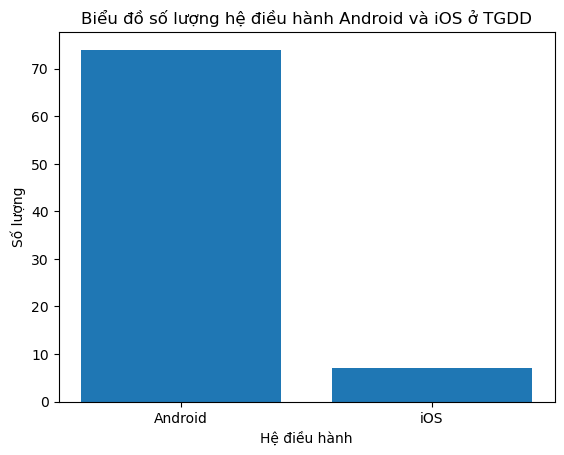

In [227]:
x = ['Android', 'iOS']
y = [len(android_versions.tolist()), len(ios_versions.tolist())]

plt.bar(x, y)
plt.xlabel('Hệ điều hành')
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng hệ điều hành Android và iOS ở TGDD')

plt.show()

In [192]:
b = df['ROM'].value_counts()
b

128 GB      39
256 GB      19
Không Có    16
32 GB       13
64 GB       10
Name: ROM, dtype: int64

Text(0.5, 1.0, 'Bieu do ROM cua dien thoai o TGDD')

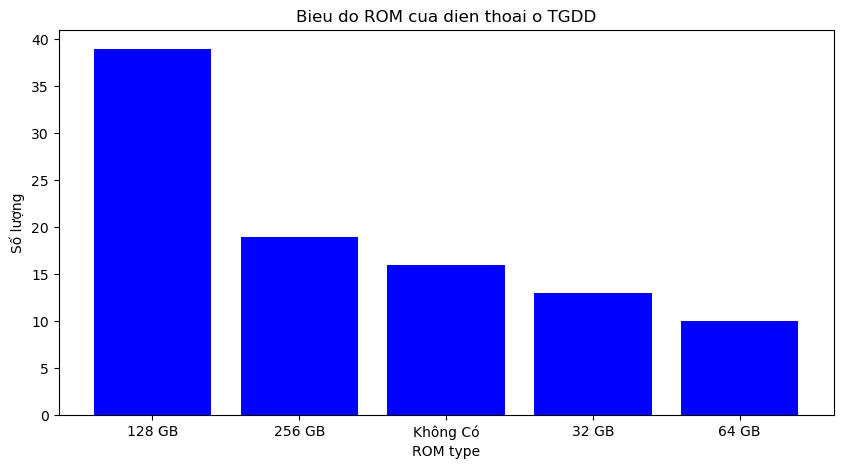

In [193]:
fig = plt.figure(figsize = (10,5))
plt.bar (b.keys(), b.values, color = 'blue')
plt.xlabel('ROM type')
plt.ylabel('Số lượng')
plt.title('Bieu do ROM cua dien thoai o TGDD')

In [194]:
a = df['RAM'].value_counts()
a

8 GB        33
Không Có    16
4 GB        15
6 GB        14
3 GB        10
2 GB         5
12 GB        4
Name: RAM, dtype: int64

Text(0.5, 1.0, 'Bieu do RAM cua dien thoai o TGDD')

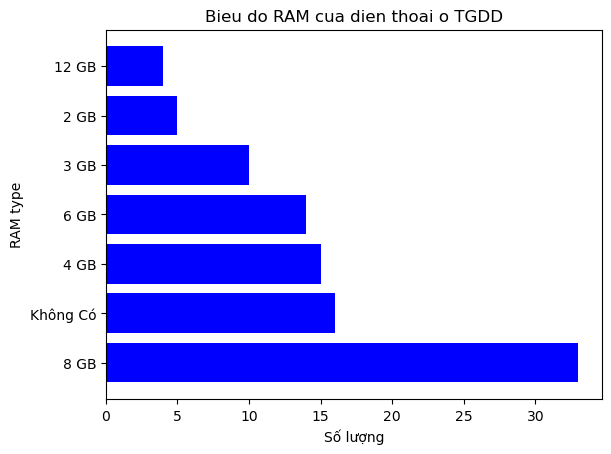

In [195]:
fig = plt.figure()
plt.barh (a.keys(), a.values, color = 'blue')
plt.ylabel('RAM type')
plt.xlabel('Số lượng')
plt.title('Bieu do RAM cua dien thoai o TGDD')

In [225]:
c = df['Price'][(df['Price'] > 25000000)]
cao = len(c)/len(df)*100
cao

2.0618556701030926

In [226]:
b = df['Price'][(df['Price'] > 10000000) & (df['Price'] <= 25000000)]
trung_binh = len(b)/len(df)*100
trung_binh

17.525773195876287

In [215]:
a = df['Price'][df['Price'] <= 10000000]
thap =len(a)/len(df)*100
thap

64.94845360824742

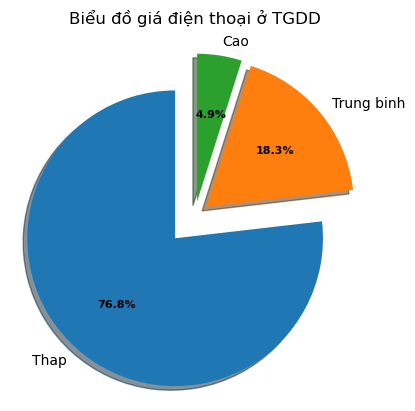

In [216]:
labels = ['Thap', 'Trung binh', 'Cao']
counts = [thap, trung_binh, cao]
myexplode = [0.2, 0.1, 0.1]

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=myexplode, shadow=True)

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Biểu đồ giá điện thoại ở TGDD")

plt.show()
